In [3]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [ ]:
save_folder = 'data_nan_mean'
X_train = pd.read_csv('../data/' + save_folder + '/X_train.csv').values
y_train = pd.read_csv('../data/' + save_folder + '/y_train.csv').values
X_test = pd.read_csv('../data/' + save_folder + '/X_test.csv').values
y_test = pd.read_csv('../data/' + save_folder + '/y_test.csv').values

y_train = np.squeeze(y_train)
n_values = np.max(y_train) + 1
y_train = np.eye(n_values)[y_train]

y_test = np.squeeze(y_test)
n_values = np.max(y_test) + 1
y_test = np.eye(n_values)[y_test]

In [ ]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=300)
results = model.evaluate(X_test, y_test)

In [ ]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=300)
results = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_label = np.argmax(y_test, axis=1)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(y_test_label, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/Neural_net/confusion_matrix')
plt.savefig('../pics/Neural_net/confusion_matrix.pdf')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_label, y_predict)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization.pdf')
plt.show(block=False)

In [ ]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=800)
results = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_label = np.argmax(y_test, axis=1)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(y_test_label, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=1200)
results = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_label = np.argmax(y_test, axis=1)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(y_test_label, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/Neural_net/confusion_matrix_1200_iteration')
plt.savefig('../pics/Neural_net/confusion_matrix_1200_iteration.pdf')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_label, y_predict)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization_1200_iteration')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization_1200_iteration.pdf')
plt.show(block=False)

In [ ]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=1500)
results = model.evaluate(X_test, y_test)

In [ ]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=1800)
results = model.evaluate(X_test, y_test)

# Performance on data without island of experiments

In [2]:
save_folder = 'data_nan_mean_no_Island'
X_train = pd.read_csv('../data/' + save_folder + '/X_train.csv').values
y_train = pd.read_csv('../data/' + save_folder + '/y_train.csv').values
X_test = pd.read_csv('../data/' + save_folder + '/X_test.csv').values
y_test = pd.read_csv('../data/' + save_folder + '/y_test.csv').values

y_train = np.squeeze(y_train)
n_values = np.max(y_train) + 1
y_train = np.eye(n_values)[y_train]

y_test = np.squeeze(y_test)
n_values = np.max(y_test) + 1
y_test = np.eye(n_values)[y_test]

In [4]:
model = Sequential()

model.add(Dense(16, input_shape=(8,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=1000)
results = model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 467
Trainable params: 467
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
17/17 - 1s - loss: 541.6797 - accuracy: 0.3603 - 582ms/epoch - 34ms/step
Epoch 2/1000
17/17 - 0s - loss: 226.0849 - accuracy: 0.3346 - 27ms/epoch - 2ms/step
Epoch 3/1000
17/17 - 0s - loss: 85.7074 - accuracy: 0.2353 - 26ms/epoch - 2ms/step
Epoch 4/1000
17/17 - 0s - loss: 22.9650 - accuracy: 0.3676 - 24m

Epoch 90/1000
17/17 - 0s - loss: 1.3809 - accuracy: 0.5846 - 23ms/epoch - 1ms/step
Epoch 91/1000
17/17 - 0s - loss: 0.8851 - accuracy: 0.6287 - 17ms/epoch - 1ms/step
Epoch 92/1000
17/17 - 0s - loss: 0.8284 - accuracy: 0.7096 - 31ms/epoch - 2ms/step
Epoch 93/1000
17/17 - 0s - loss: 0.7354 - accuracy: 0.6544 - 15ms/epoch - 894us/step
Epoch 94/1000
17/17 - 0s - loss: 0.6775 - accuracy: 0.7096 - 34ms/epoch - 2ms/step
Epoch 95/1000
17/17 - 0s - loss: 0.5211 - accuracy: 0.7500 - 16ms/epoch - 952us/step
Epoch 96/1000
17/17 - 0s - loss: 0.6184 - accuracy: 0.7132 - 30ms/epoch - 2ms/step
Epoch 97/1000
17/17 - 0s - loss: 0.6802 - accuracy: 0.7316 - 18ms/epoch - 1ms/step
Epoch 98/1000
17/17 - 0s - loss: 0.4862 - accuracy: 0.7868 - 17ms/epoch - 981us/step
Epoch 99/1000
17/17 - 0s - loss: 0.5523 - accuracy: 0.7684 - 32ms/epoch - 2ms/step
Epoch 100/1000
17/17 - 0s - loss: 0.4933 - accuracy: 0.7757 - 16ms/epoch - 947us/step
Epoch 101/1000
17/17 - 0s - loss: 0.5146 - accuracy: 0.7684 - 28ms/epoch - 2ms

Epoch 188/1000
17/17 - 0s - loss: 0.3415 - accuracy: 0.8382 - 20ms/epoch - 1ms/step
Epoch 189/1000
17/17 - 0s - loss: 0.2713 - accuracy: 0.9154 - 28ms/epoch - 2ms/step
Epoch 190/1000
17/17 - 0s - loss: 0.3185 - accuracy: 0.8934 - 18ms/epoch - 1ms/step
Epoch 191/1000
17/17 - 0s - loss: 0.4354 - accuracy: 0.8199 - 32ms/epoch - 2ms/step
Epoch 192/1000
17/17 - 0s - loss: 0.3935 - accuracy: 0.8382 - 16ms/epoch - 967us/step
Epoch 193/1000
17/17 - 0s - loss: 0.4294 - accuracy: 0.8015 - 32ms/epoch - 2ms/step
Epoch 194/1000
17/17 - 0s - loss: 0.5552 - accuracy: 0.7794 - 19ms/epoch - 1ms/step
Epoch 195/1000
17/17 - 0s - loss: 0.3727 - accuracy: 0.8235 - 26ms/epoch - 2ms/step
Epoch 196/1000
17/17 - 0s - loss: 0.2906 - accuracy: 0.8860 - 23ms/epoch - 1ms/step
Epoch 197/1000
17/17 - 0s - loss: 0.2782 - accuracy: 0.9007 - 27ms/epoch - 2ms/step
Epoch 198/1000
17/17 - 0s - loss: 0.3659 - accuracy: 0.8640 - 20ms/epoch - 1ms/step
Epoch 199/1000
17/17 - 0s - loss: 0.4026 - accuracy: 0.7978 - 27ms/epoch -

Epoch 286/1000
17/17 - 0s - loss: 0.8827 - accuracy: 0.6985 - 24ms/epoch - 1ms/step
Epoch 287/1000
17/17 - 0s - loss: 0.4780 - accuracy: 0.7868 - 26ms/epoch - 2ms/step
Epoch 288/1000
17/17 - 0s - loss: 0.4108 - accuracy: 0.8272 - 21ms/epoch - 1ms/step
Epoch 289/1000
17/17 - 0s - loss: 0.5794 - accuracy: 0.7978 - 20ms/epoch - 1ms/step
Epoch 290/1000
17/17 - 0s - loss: 0.8823 - accuracy: 0.7574 - 18ms/epoch - 1ms/step
Epoch 291/1000
17/17 - 0s - loss: 0.2595 - accuracy: 0.8860 - 16ms/epoch - 945us/step
Epoch 292/1000
17/17 - 0s - loss: 0.2312 - accuracy: 0.8860 - 17ms/epoch - 1ms/step
Epoch 293/1000
17/17 - 0s - loss: 0.4677 - accuracy: 0.7978 - 28ms/epoch - 2ms/step
Epoch 294/1000
17/17 - 0s - loss: 0.4943 - accuracy: 0.7904 - 21ms/epoch - 1ms/step
Epoch 295/1000
17/17 - 0s - loss: 0.2445 - accuracy: 0.8934 - 33ms/epoch - 2ms/step
Epoch 296/1000
17/17 - 0s - loss: 0.1922 - accuracy: 0.9301 - 22ms/epoch - 1ms/step
Epoch 297/1000
17/17 - 0s - loss: 0.2238 - accuracy: 0.9044 - 21ms/epoch -

17/17 - 0s - loss: 0.1409 - accuracy: 0.9559 - 21ms/epoch - 1ms/step
Epoch 384/1000
17/17 - 0s - loss: 0.1371 - accuracy: 0.9559 - 16ms/epoch - 959us/step
Epoch 385/1000
17/17 - 0s - loss: 0.3408 - accuracy: 0.8566 - 24ms/epoch - 1ms/step
Epoch 386/1000
17/17 - 0s - loss: 0.2227 - accuracy: 0.9118 - 20ms/epoch - 1ms/step
Epoch 387/1000
17/17 - 0s - loss: 0.2197 - accuracy: 0.9044 - 28ms/epoch - 2ms/step
Epoch 388/1000
17/17 - 0s - loss: 0.3620 - accuracy: 0.8419 - 15ms/epoch - 906us/step
Epoch 389/1000
17/17 - 0s - loss: 0.2655 - accuracy: 0.9007 - 25ms/epoch - 1ms/step
Epoch 390/1000
17/17 - 0s - loss: 0.1560 - accuracy: 0.9449 - 25ms/epoch - 1ms/step
Epoch 391/1000
17/17 - 0s - loss: 0.2337 - accuracy: 0.9081 - 22ms/epoch - 1ms/step
Epoch 392/1000
17/17 - 0s - loss: 0.1218 - accuracy: 0.9596 - 28ms/epoch - 2ms/step
Epoch 393/1000
17/17 - 0s - loss: 0.1311 - accuracy: 0.9522 - 18ms/epoch - 1ms/step
Epoch 394/1000
17/17 - 0s - loss: 0.2350 - accuracy: 0.9228 - 26ms/epoch - 2ms/step
Epo

Epoch 481/1000
17/17 - 0s - loss: 0.5330 - accuracy: 0.8235 - 14ms/epoch - 835us/step
Epoch 482/1000
17/17 - 0s - loss: 0.7117 - accuracy: 0.7978 - 29ms/epoch - 2ms/step
Epoch 483/1000
17/17 - 0s - loss: 0.3207 - accuracy: 0.8750 - 17ms/epoch - 973us/step
Epoch 484/1000
17/17 - 0s - loss: 0.3203 - accuracy: 0.8603 - 16ms/epoch - 919us/step
Epoch 485/1000
17/17 - 0s - loss: 0.1846 - accuracy: 0.9375 - 24ms/epoch - 1ms/step
Epoch 486/1000
17/17 - 0s - loss: 0.2819 - accuracy: 0.8566 - 26ms/epoch - 2ms/step
Epoch 487/1000
17/17 - 0s - loss: 0.1941 - accuracy: 0.9081 - 21ms/epoch - 1ms/step
Epoch 488/1000
17/17 - 0s - loss: 0.1855 - accuracy: 0.9485 - 14ms/epoch - 797us/step
Epoch 489/1000
17/17 - 0s - loss: 0.1425 - accuracy: 0.9596 - 28ms/epoch - 2ms/step
Epoch 490/1000
17/17 - 0s - loss: 0.1663 - accuracy: 0.9265 - 21ms/epoch - 1ms/step
Epoch 491/1000
17/17 - 0s - loss: 0.2673 - accuracy: 0.8787 - 22ms/epoch - 1ms/step
Epoch 492/1000
17/17 - 0s - loss: 0.1239 - accuracy: 0.9522 - 21ms/e

Epoch 579/1000
17/17 - 0s - loss: 0.0918 - accuracy: 0.9743 - 19ms/epoch - 1ms/step
Epoch 580/1000
17/17 - 0s - loss: 0.0825 - accuracy: 0.9816 - 23ms/epoch - 1ms/step
Epoch 581/1000
17/17 - 0s - loss: 0.1091 - accuracy: 0.9485 - 24ms/epoch - 1ms/step
Epoch 582/1000
17/17 - 0s - loss: 0.0997 - accuracy: 0.9632 - 25ms/epoch - 1ms/step
Epoch 583/1000
17/17 - 0s - loss: 0.1953 - accuracy: 0.9118 - 18ms/epoch - 1ms/step
Epoch 584/1000
17/17 - 0s - loss: 0.1434 - accuracy: 0.9412 - 31ms/epoch - 2ms/step
Epoch 585/1000
17/17 - 0s - loss: 0.0924 - accuracy: 0.9632 - 18ms/epoch - 1ms/step
Epoch 586/1000
17/17 - 0s - loss: 0.2890 - accuracy: 0.8860 - 24ms/epoch - 1ms/step
Epoch 587/1000
17/17 - 0s - loss: 0.7228 - accuracy: 0.7978 - 17ms/epoch - 1ms/step
Epoch 588/1000
17/17 - 0s - loss: 0.3575 - accuracy: 0.8603 - 35ms/epoch - 2ms/step
Epoch 589/1000
17/17 - 0s - loss: 0.4499 - accuracy: 0.8382 - 33ms/epoch - 2ms/step
Epoch 590/1000
17/17 - 0s - loss: 0.0953 - accuracy: 0.9632 - 29ms/epoch - 2

Epoch 677/1000
17/17 - 0s - loss: 0.0851 - accuracy: 0.9779 - 23ms/epoch - 1ms/step
Epoch 678/1000
17/17 - 0s - loss: 0.0830 - accuracy: 0.9669 - 14ms/epoch - 809us/step
Epoch 679/1000
17/17 - 0s - loss: 0.0893 - accuracy: 0.9779 - 26ms/epoch - 2ms/step
Epoch 680/1000
17/17 - 0s - loss: 0.0927 - accuracy: 0.9632 - 26ms/epoch - 2ms/step
Epoch 681/1000
17/17 - 0s - loss: 0.2094 - accuracy: 0.9007 - 18ms/epoch - 1ms/step
Epoch 682/1000
17/17 - 0s - loss: 0.1102 - accuracy: 0.9632 - 17ms/epoch - 975us/step
Epoch 683/1000
17/17 - 0s - loss: 0.1819 - accuracy: 0.9228 - 30ms/epoch - 2ms/step
Epoch 684/1000
17/17 - 0s - loss: 0.2356 - accuracy: 0.9154 - 21ms/epoch - 1ms/step
Epoch 685/1000
17/17 - 0s - loss: 0.1925 - accuracy: 0.9265 - 26ms/epoch - 2ms/step
Epoch 686/1000
17/17 - 0s - loss: 0.1964 - accuracy: 0.9118 - 20ms/epoch - 1ms/step
Epoch 687/1000
17/17 - 0s - loss: 0.1983 - accuracy: 0.9081 - 20ms/epoch - 1ms/step
Epoch 688/1000
17/17 - 0s - loss: 0.2304 - accuracy: 0.9118 - 31ms/epoch

Epoch 775/1000
17/17 - 0s - loss: 0.0760 - accuracy: 0.9743 - 22ms/epoch - 1ms/step
Epoch 776/1000
17/17 - 0s - loss: 0.1375 - accuracy: 0.9522 - 16ms/epoch - 949us/step
Epoch 777/1000
17/17 - 0s - loss: 0.0659 - accuracy: 0.9779 - 17ms/epoch - 973us/step
Epoch 778/1000
17/17 - 0s - loss: 0.0804 - accuracy: 0.9779 - 23ms/epoch - 1ms/step
Epoch 779/1000
17/17 - 0s - loss: 0.0882 - accuracy: 0.9632 - 22ms/epoch - 1ms/step
Epoch 780/1000
17/17 - 0s - loss: 0.0568 - accuracy: 0.9816 - 22ms/epoch - 1ms/step
Epoch 781/1000
17/17 - 0s - loss: 0.0603 - accuracy: 0.9779 - 17ms/epoch - 989us/step
Epoch 782/1000
17/17 - 0s - loss: 0.0831 - accuracy: 0.9669 - 26ms/epoch - 2ms/step
Epoch 783/1000
17/17 - 0s - loss: 0.0805 - accuracy: 0.9669 - 21ms/epoch - 1ms/step
Epoch 784/1000
17/17 - 0s - loss: 0.0498 - accuracy: 0.9779 - 17ms/epoch - 979us/step
Epoch 785/1000
17/17 - 0s - loss: 0.1189 - accuracy: 0.9485 - 21ms/epoch - 1ms/step
Epoch 786/1000
17/17 - 0s - loss: 0.3579 - accuracy: 0.8603 - 17ms/e

17/17 - 0s - loss: 0.0917 - accuracy: 0.9669 - 21ms/epoch - 1ms/step
Epoch 873/1000
17/17 - 0s - loss: 0.0844 - accuracy: 0.9743 - 27ms/epoch - 2ms/step
Epoch 874/1000
17/17 - 0s - loss: 0.0762 - accuracy: 0.9706 - 22ms/epoch - 1ms/step
Epoch 875/1000
17/17 - 0s - loss: 0.1498 - accuracy: 0.9228 - 21ms/epoch - 1ms/step
Epoch 876/1000
17/17 - 0s - loss: 0.1421 - accuracy: 0.9449 - 24ms/epoch - 1ms/step
Epoch 877/1000
17/17 - 0s - loss: 0.1710 - accuracy: 0.9118 - 20ms/epoch - 1ms/step
Epoch 878/1000
17/17 - 0s - loss: 0.1128 - accuracy: 0.9559 - 16ms/epoch - 924us/step
Epoch 879/1000
17/17 - 0s - loss: 0.0634 - accuracy: 0.9743 - 10ms/epoch - 601us/step
Epoch 880/1000
17/17 - 0s - loss: 0.0733 - accuracy: 0.9669 - 20ms/epoch - 1ms/step
Epoch 881/1000
17/17 - 0s - loss: 0.0671 - accuracy: 0.9816 - 19ms/epoch - 1ms/step
Epoch 882/1000
17/17 - 0s - loss: 0.0576 - accuracy: 0.9853 - 23ms/epoch - 1ms/step
Epoch 883/1000
17/17 - 0s - loss: 0.0640 - accuracy: 0.9816 - 20ms/epoch - 1ms/step
Epo

Epoch 970/1000
17/17 - 0s - loss: 0.1395 - accuracy: 0.9412 - 23ms/epoch - 1ms/step
Epoch 971/1000
17/17 - 0s - loss: 0.0830 - accuracy: 0.9706 - 21ms/epoch - 1ms/step
Epoch 972/1000
17/17 - 0s - loss: 0.0552 - accuracy: 0.9816 - 17ms/epoch - 989us/step
Epoch 973/1000
17/17 - 0s - loss: 0.0541 - accuracy: 0.9779 - 29ms/epoch - 2ms/step
Epoch 974/1000
17/17 - 0s - loss: 0.0576 - accuracy: 0.9816 - 19ms/epoch - 1ms/step
Epoch 975/1000
17/17 - 0s - loss: 0.0412 - accuracy: 0.9890 - 28ms/epoch - 2ms/step
Epoch 976/1000
17/17 - 0s - loss: 0.0582 - accuracy: 0.9853 - 20ms/epoch - 1ms/step
Epoch 977/1000
17/17 - 0s - loss: 0.0643 - accuracy: 0.9743 - 23ms/epoch - 1ms/step
Epoch 978/1000
17/17 - 0s - loss: 0.0500 - accuracy: 0.9853 - 17ms/epoch - 976us/step
Epoch 979/1000
17/17 - 0s - loss: 0.0633 - accuracy: 0.9743 - 26ms/epoch - 2ms/step
Epoch 980/1000
17/17 - 0s - loss: 0.0798 - accuracy: 0.9669 - 19ms/epoch - 1ms/step
Epoch 981/1000
17/17 - 0s - loss: 0.0403 - accuracy: 0.9890 - 30ms/epoch

3/3 [==============================] - 0s 8ms/step


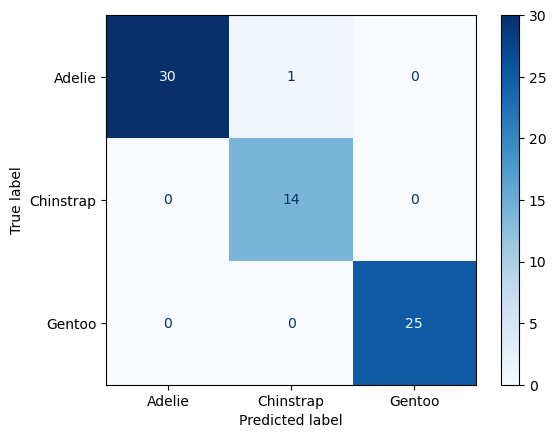

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_label = np.argmax(y_test, axis=1)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(y_test_label, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/Neural_net/confusion_matrix_1000_iteration_no_Island')
plt.savefig('../pics/Neural_net/confusion_matrix_1000_iteration_no_Island.pdf')
plt.show()

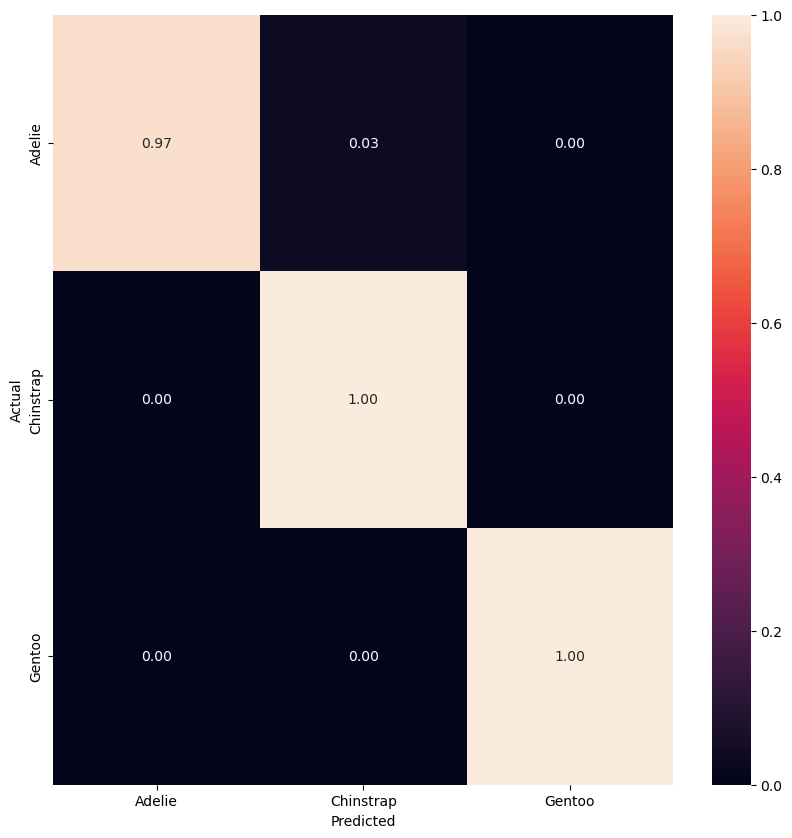

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_label, y_predict)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization_1000_iteration_no_Island')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization_1000_iteration_no_Island.pdf')
plt.show(block=False)